# Housing Analysis
**Author**: Eric Wehmueller
***

## Overview

This project is the second project for Flatiron School's bootcamp program in Data Science.  We are being placed into a hypothetical situation as a Data Scientist and hoping to provide value to our business for the scenario we are given.


## Business Problem

I have been hired by a real estate agencythat helps homeowners buy and/or sell homes.  For this project, I am to provide advice to homeowners about how home renovations might increase the estimated value of their homes, and by what amount.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Data Investigation and Cleaning

To start, we have access to the King County House Sales dataset.  Let's take a look at this to get a feel for what our starting point is and what raw data we have to work with.

In [2]:
df_original = pd.read_csv("data\kc_house_data.csv")

In [3]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
df_original.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570



Per the project description, I will be ignoring the following features: date, view, sqft_above, sqft_basement, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15. For the time being, I am trying to make my modeling phase in this project as simple as possible.

In [5]:
df_col_drops = df_original.drop(columns=['id', 'date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'])
display(df_col_drops)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987
...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,2009
21593,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2014
21594,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,2009
21595,400000.0,3,2.50,1600,2388,2.0,NaN,3,8,2004


In [6]:
df_col_drops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   19221 non-null  float64
 7   condition    21597 non-null  int64  
 8   grade        21597 non-null  int64  
 9   yr_built     21597 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.6 MB


Waterfront appears to have ~2000 null values. Let's investigate what values are in this column to see what we can do about the null values.

Which ones are the most important features?

In [7]:
df_col_drops.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

Only 146 have a waterfront view. Since this is a binary-filled column, I believe we can fill in all NaNs with a zero value. This makes sense, as NaNs almost certainly denotes the absence of a waterfront view.

In [8]:
df_col_drops.waterfront.fillna(0, inplace=True)
display(df_col_drops.head())

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987


In [9]:
df_col_drops.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,3.409825,7.657915,1970.999676
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.650546,1.173200,29.375234
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,1997.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,2015.000000


In [10]:
df_col_drops.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'yr_built'],
      dtype='object')

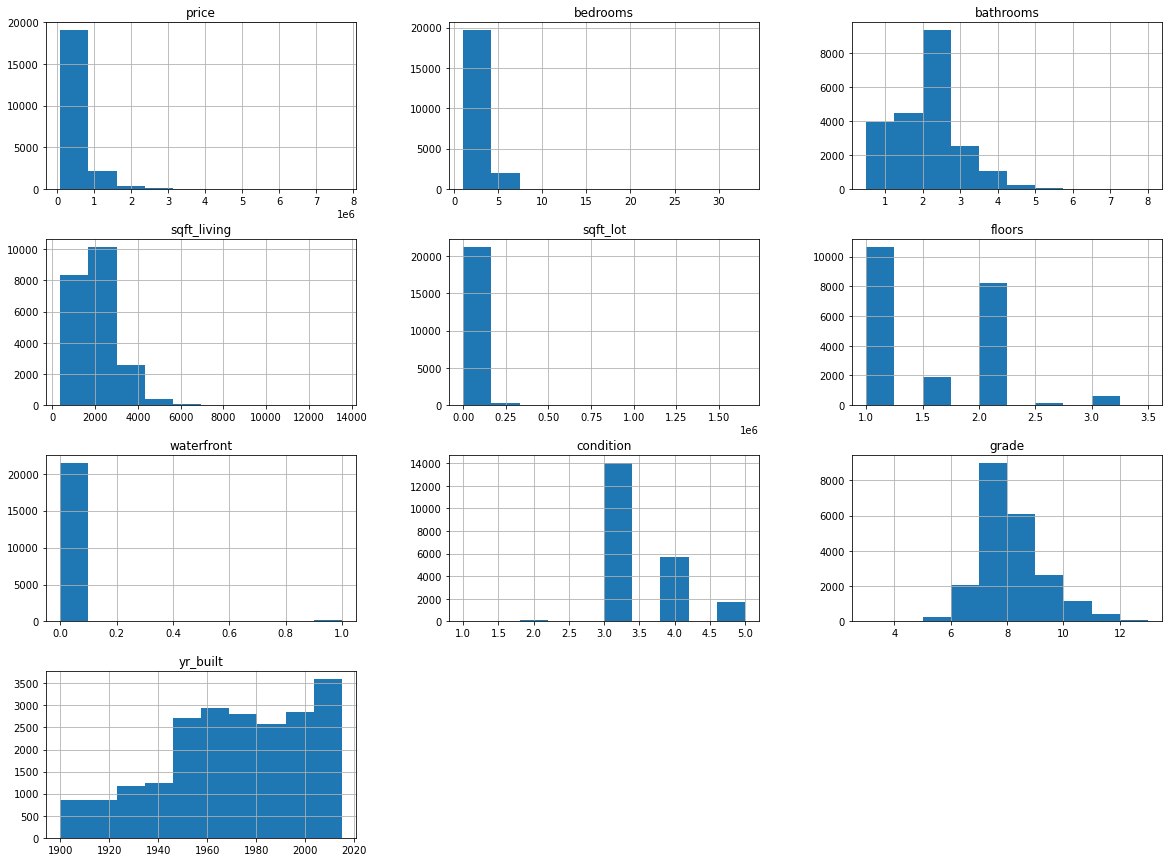

In [11]:
#iterating over all columns except id to see general distributions

df_col_drops.hist(figsize = (20,15));

It appears that we have some outliers in this data, so it's a little difficult to get a sense for what some the distrubutions actually are. 

Specifically, I'm seeing a single entry priced at 7.7 million. 

I also can't really tell what the bedroom distribution is with an outlier of 33. 

sqft_lot has only a single column in this view and the mean is vastly different from the median. We will need to take a closer look at this as well. 

Condition and grade seem to be relatively normal.

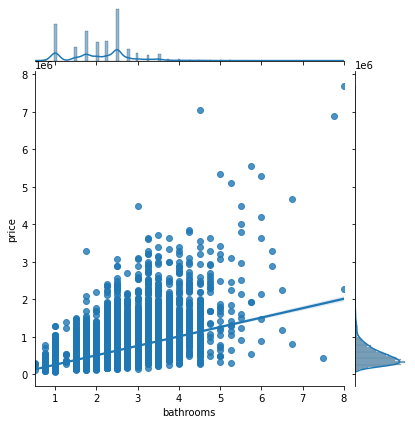

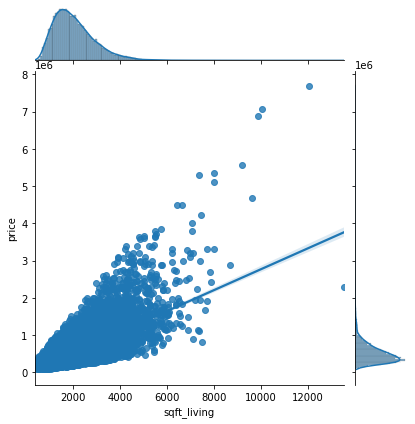

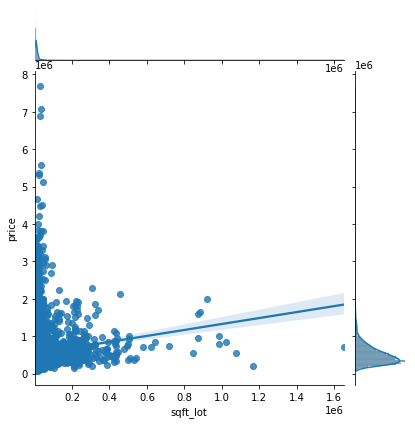

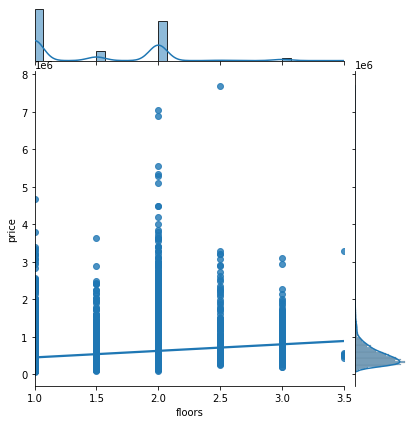

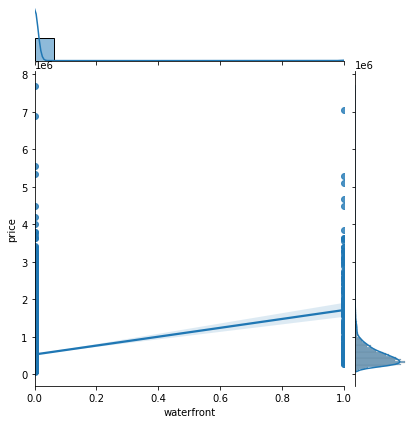

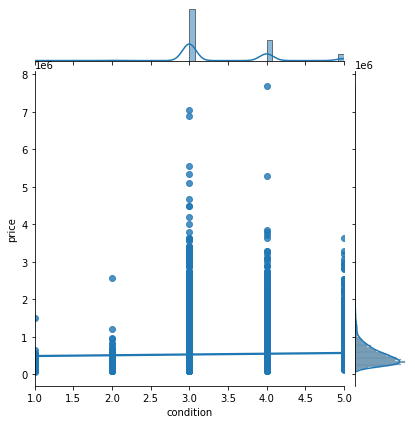

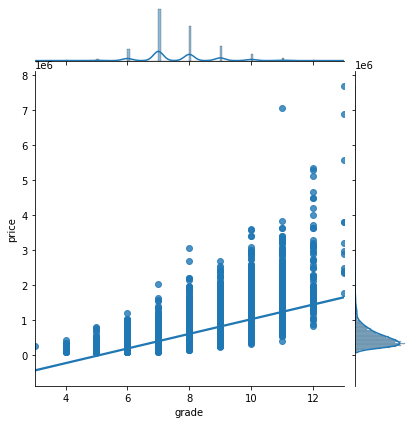

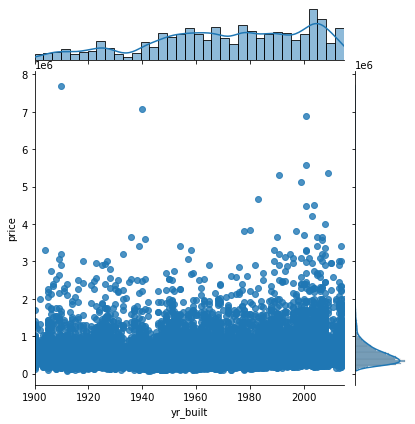

In [12]:
#Check for linearity via jointplots
for col_name in df_col_drops.columns[2:]:
    sns.jointplot(x=col_name, y='price', data=df_col_drops, kind='reg');

It worth noting that these jointplots reveal several of these columns to have linear relations with price.  

**Linear Relation**: sqft_living, grade

**Somehwat Linear**: bathrooms, sqft_lot, waterfront

**Little to No Linear Relation**: floors, condition, yr_built

We are going to check for Multicollinearity by generating the pairwise correlation coefficients of our potential predictive features and visualizing them as a heatmap.

In [13]:
first_features = ['sqft_living', 'grade', 'bathrooms', 'sqft_lot', 'waterfront', 'floors', 'condition', 'yr_built']
corr = df_col_drops[first_features].corr()
corr

,sqft_living,grade,bathrooms,sqft_lot,waterfront,floors,condition,yr_built
sqft_living,1.000000,0.762779,0.755758,0.173453,0.104637,0.353953,-0.059445,0.318152
grade,0.762779,1.000000,0.665838,0.114731,0.082818,0.458794,-0.146896,0.447865
bathrooms,0.755758,0.665838,1.000000,0.088373,0.063629,0.502582,-0.126479,0.507173
sqft_lot,0.173453,0.114731,0.088373,1.000000,0.021459,-0.004814,-0.008830,0.052946
waterfront,0.104637,0.082818,0.063629,0.021459,1.000000,0.020797,0.016648,-0.024487
floors,0.353953,0.458794,0.502582,-0.004814,0.020797,1.000000,-0.264075,0.489193
condition,-0.059445,-0.146896,-0.126479,-0.008830,0.016648,-0.264075,1.000000,-0.361592
yr_built,0.318152,0.447865,0.507173,0.052946,-0.024487,0.489193,-0.361592,1.000000


<AxesSubplot:>

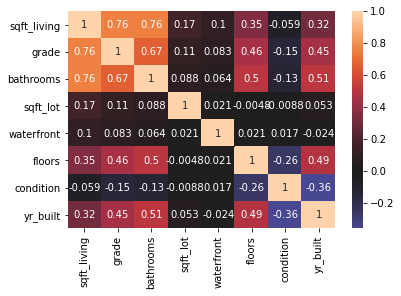

In [14]:
sns.heatmap(corr, center=0, annot=True)

In [15]:
# pd.plotting.scatter_matrix()

sqft_living and grade = 0.76

sqft_living and bathrooms = 0.76

grade and bathrooms = 0.67


## Modeling & Model 1

In [16]:
# target = df_col_drops['price']
# features = df_col_drops.iloc[:,:-1]

# X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25)

In [17]:
outcome = 'price'
x_cols = list(df_col_drops.columns)
x_cols.remove(outcome)
print(x_cols)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'yr_built']


In [18]:
train, test = train_test_split(df_col_drops)

In [19]:
for col in x_cols:
    train[col] = (train[col] - train[col].mean())/train[col].std()
display(train.head())
print(len(train), len(test))

<ipython-input-19-f07e438ec62e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col] = (train[col] - train[col].mean())/train[col].std()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
2567,895000.0,1.800077,0.493474,0.291255,-0.020731,-0.911977,-0.079605,0.911348,0.286032,-0.306766
1298,588000.0,0.694390,-0.156453,-0.439562,-0.250615,-0.911977,-0.079605,-0.633508,-0.565597,-0.714531
7050,490000.0,0.694390,0.493474,0.618486,-0.134960,-0.911977,-0.079605,0.911348,0.286032,0.168960
15626,259950.0,-1.516982,-1.456305,-1.410349,-0.173129,-0.911977,-0.079605,-0.633508,-1.417227,-0.816472
5720,150550.0,0.694390,-1.456305,-0.668624,-0.224095,0.014413,-0.079605,-0.633508,-0.565597,-0.884433


16197 5400


In [20]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     3262.
Date:                Sun, 14 Mar 2021   Prob (F-statistic):               0.00
Time:                        07:45:58   Log-Likelihood:            -2.2205e+05
No. Observations:               16197   AIC:                         4.441e+05
Df Residuals:                   16187   BIC:                         4.442e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.405e+05   1710.557    316.004      0.000    5.37e+05    5.44e+05
bedrooms    -4.305e+04   2229.938    -19.305      0.000   -4.74e+04   -3.87e+04
bathrooms    3.921e+04   3070.010     12.772      0.000    3.32e+04    4.52e+04
sqft_living  1.643e+05   3525.171     46.612      0.000    1.57e+05    1.71e+05
sqft_lot    -8130.0836   1751.805     -4.641      0.000   -1.16e+04   -4696.352
floors       1.052e+04   2144.228      4.904      0.000    6312.792    1.47e+04
waterfront   5.944e+04   1729.135     34.378      0.000    5.61e+04    6.28e+04
condition    1.322e+04   1861.176      7.103      0.000    9572.248    1.69e+04
grade        1.519e+05   2920.806     52.002      0.000    1.46e+05    1.58e+05
yr_built    -1.116e+05   2248.739    -49.630      0.000   -1.16e+05   -1.07e+05
==============================================================================
Omnibus:                    11487.924   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           648406.352
Skew:                           2.817   Prob(JB):                         0.00
Kurtosis:                      33.480   Cond. No.                         4.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p-values are less than 0.05 for our selected columns. Let's take a look at our residuals for normality.

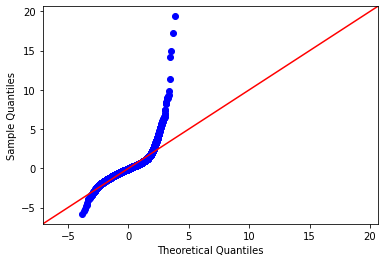

In [21]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

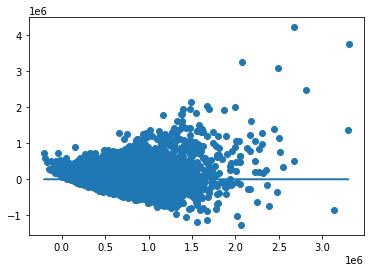

In [22]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

This doesn't look good, as our QQ plot looks incorrect and we have a pronounced funnel shape on our check for homoscedasticity. We are going to need to make some changes.

## Model 2

For this iteration, I'm going to remove some outliers. (log transformation?)

I recall having the most issues determining the normal distributions of sqft_lot and bedrooms, so I'm going to filter on both.

<AxesSubplot:>

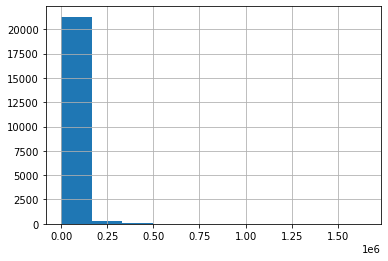

In [23]:
df_col_drops.sqft_lot.hist()

In [24]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q,df_col_drops.sqft_lot.quantile(q=q)))

0.8 percentile: 12182.399999999998
0.81 percentile: 12558.0
0.82 percentile: 13055.439999999995
0.83 percentile: 13503.68
0.84 percentile: 14197.0
0.85 percentile: 15000.0
0.86 percentile: 15716.040000000012
0.87 percentile: 16646.640000000003
0.88 percentile: 18000.0
0.89 percentile: 19550.0
0.9 percentile: 21371.600000000006
0.91 percentile: 24149.360000000015
0.92 percentile: 28505.119999999995
0.93 percentile: 34848.0
0.94 percentile: 37643.19999999999
0.95 percentile: 43307.200000000026
0.96 percentile: 50655.28
0.97 percentile: 67381.7199999999
0.98 percentile: 107157.0
0.99 percentile: 213008.0


I think filtering out homes with greater than 100k sqaure feet is acceptable here.

<AxesSubplot:>

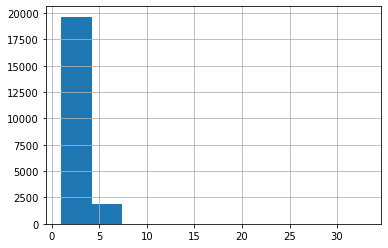

In [25]:
df_col_drops.bedrooms.hist()

In [26]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q,df_col_drops.bedrooms.quantile(q=q)))

0.8 percentile: 4.0
0.81 percentile: 4.0
0.82 percentile: 4.0
0.83 percentile: 4.0
0.84 percentile: 4.0
0.85 percentile: 4.0
0.86 percentile: 4.0
0.87 percentile: 4.0
0.88 percentile: 4.0
0.89 percentile: 4.0
0.9 percentile: 4.0
0.91 percentile: 4.0
0.92 percentile: 5.0
0.93 percentile: 5.0
0.94 percentile: 5.0
0.95 percentile: 5.0
0.96 percentile: 5.0
0.97 percentile: 5.0
0.98 percentile: 5.0
0.99 percentile: 6.0


In [27]:
df_col_drops.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

I will also be filtering out all houses with more than 6 bedrooms, removing less than 1% of the total entries. (may overlap with sq footage)

In [28]:
orig_tot = len(df_col_drops)
df_col_drops = df_col_drops[df_col_drops.sqft_lot < 200000] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df_col_drops))/orig_tot)

df_col_drops = df_col_drops[df_col_drops.bedrooms < 8] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df_col_drops))/orig_tot)

# df.list_price = df.list_price.map(np.log) # Applying a log transformation
train2, test2 = train_test_split(df_col_drops)

# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model2 = ols(formula=formula, data=train2).fit()
model2.summary()

Percent removed: 0.011946103625503543
Percent removed: 0.013057369079038756


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     3209.
Date:                Sun, 14 Mar 2021   Prob (F-statistic):               0.00
Time:                        07:45:59   Log-Likelihood:            -2.1866e+05
No. Observations:               15986   AIC:                         4.373e+05
Df Residuals:                   15976   BIC:                         4.374e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6.626e+06   1.46e+05     45.417      0.000    6.34e+06    6.91e+06
bedrooms    -4.731e+04   2453.890    -19.280      0.000   -5.21e+04   -4.25e+04
bathrooms    4.933e+04   3915.730     12.599      0.000    4.17e+04     5.7e+04
sqft_living   176.2148      3.850     45.771      0.000     168.669     183.761
sqft_lot       -0.9601      0.101     -9.502      0.000      -1.158      -0.762
floors        1.97e+04   3898.204      5.054      0.000    1.21e+04    2.73e+04
waterfront   7.082e+05   2.07e+04     34.251      0.000    6.68e+05    7.49e+05
condition    2.039e+04   2790.765      7.306      0.000    1.49e+04    2.59e+04
grade        1.311e+05   2435.821     53.825      0.000    1.26e+05    1.36e+05
yr_built    -3803.0280     75.120    -50.626      0.000   -3950.271   -3655.785
==============================================================================
Omnibus:                    10333.553   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           437525.733
Skew:                           2.527   Prob(JB):                         0.00
Kurtosis:                      28.126   Cond. No.                     1.83e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

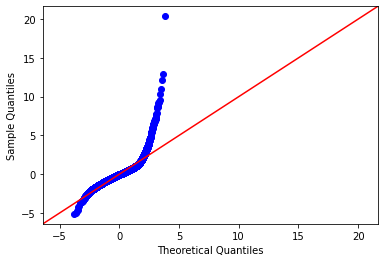

In [29]:
fig = sm.graphics.qqplot(model2.resid, dist=stats.norm, line='45', fit=True)

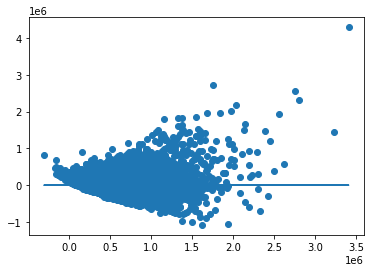

In [30]:
plt.scatter(model2.predict(train2[x_cols]), model2.resid)
plt.plot(model2.predict(train2[x_cols]), [0 for i in range(len(train2))])

Similar problems as last time, but our OLS has alerted us that there is strong collinearity. Let's investigate what we should remove.

In [31]:
X = df_col_drops[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('bedrooms', 25.84410458433369),
 ('bathrooms', 24.704273842448526),
 ('sqft_living', 26.360389763581416),
 ('sqft_lot', 1.5942010969375862),
 ('floors', 13.270504759043527),
 ('waterfront', 1.027287877790707),
 ('condition', 29.547755678405252),
 ('grade', 126.00478906676463),
 ('yr_built', 127.2802225073895)]

Going to drop 'grade' and 'yr_built' from our model for the time being and go from there. You usually want to remove variables with a cif of 10 or greater, incdicating that they are displaying multicollinearity with other variables in the feature set.

In [33]:
train2a, test2a = train_test_split(df_col_drops)

outcome = 'price'
x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot', 'floors','waterfront','condition']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model2a = ols(formula=formula, data=train2a).fit()
model2a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     2780.
Date:                Sun, 14 Mar 2021   Prob (F-statistic):               0.00
Time:                        07:46:11   Log-Likelihood:            -2.2091e+05
No. Observations:               15986   AIC:                         4.418e+05
Df Residuals:                   15978   BIC:                         4.419e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -8.289e+04   1.45e+04     -5.715      0.000   -1.11e+05   -5.45e+04
bedrooms    -6.198e+04   2789.826    -22.217      0.000   -6.74e+04   -5.65e+04
bathrooms    5540.9636   4226.434      1.311      0.190   -2743.323    1.38e+04
sqft_living   310.3410      3.618     85.777      0.000     303.249     317.433
sqft_lot       -1.2536      0.117    -10.721      0.000      -1.483      -1.024
floors       1.412e+04   4306.499      3.279      0.001    5678.362    2.26e+04
waterfront   8.277e+05   2.31e+04     35.867      0.000    7.83e+05    8.73e+05
condition    4.769e+04   3067.219     15.548      0.000    4.17e+04    5.37e+04
==============================================================================
Omnibus:                     9151.694   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           239660.309
Skew:                           2.255   Prob(JB):                         0.00
Kurtosis:                      21.425   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
X = df_col_drops[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('bedrooms', 22.1306578792085),
 ('bathrooms', 24.161685300372206),
 ('sqft_living', 17.5686473862456),
 ('sqft_lot', 1.574539898992644),
 ('floors', 10.150129879886826),
 ('waterfront', 1.0271944433012918),
 ('condition', 11.40326456153139)]

In [35]:
train2b, test2b = train_test_split(df_col_drops)

x_cols = ['sqft_living','sqft_lot', 'floors','waterfront','condition']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model2b = ols(formula=formula, data=train2b).fit()
model2b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     3750.
Date:                Sun, 14 Mar 2021   Prob (F-statistic):               0.00
Time:                        07:46:15   Log-Likelihood:            -2.2121e+05
No. Observations:               15986   AIC:                         4.424e+05
Df Residuals:                   15980   BIC:                         4.425e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.106e+05   1.36e+04    -15.432      0.000   -2.37e+05   -1.84e+05
sqft_living   276.7193      2.438    113.525      0.000     271.942     281.497
sqft_lot       -1.0090      0.120     -8.406      0.000      -1.244      -0.774
floors        1.83e+04   4040.390      4.529      0.000    1.04e+04    2.62e+04
waterfront   9.044e+05   2.31e+04     39.095      0.000    8.59e+05     9.5e+05
condition    4.558e+04   3117.965     14.617      0.000    3.95e+04    5.17e+04
==============================================================================
Omnibus:                     8534.603   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           159683.195
Skew:                           2.150   Prob(JB):                         0.00
Kurtosis:                      17.874   Cond. No.                     2.43e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.43e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
X = df_col_drops[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('sqft_living', 7.618321152504307),
 ('sqft_lot', 1.5659406657127588),
 ('floors', 7.8317993873742635),
 ('waterfront', 1.018750815796976),
 ('condition', 6.828472717446049)]

In [37]:
train2c, test2c = train_test_split(df_col_drops)

x_cols = ['sqft_living','sqft_lot','waterfront','condition']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model2c = ols(formula=formula, data=train2c).fit()
model2c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     4703.
Date:                Sun, 14 Mar 2021   Prob (F-statistic):               0.00
Time:                        07:46:18   Log-Likelihood:            -2.2122e+05
No. Observations:               15986   AIC:                         4.425e+05
Df Residuals:                   15981   BIC:                         4.425e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.787e+05   1.17e+04    -15.250      0.000   -2.02e+05   -1.56e+05
sqft_living   284.0659      2.258    125.814      0.000     279.640     288.492
sqft_lot       -1.2210      0.116    -10.527      0.000      -1.448      -0.994
waterfront   9.265e+05   2.46e+04     37.612      0.000    8.78e+05    9.75e+05
condition    4.013e+04   3031.316     13.239      0.000    3.42e+04    4.61e+04
==============================================================================
Omnibus:                     9800.512   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           299534.509
Skew:                           2.438   Prob(JB):                         0.00
Kurtosis:                      23.638   Cond. No.                     2.63e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
X = df_col_drops[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('sqft_living', 5.478029516344379),
 ('sqft_lot', 1.5424312328901102),
 ('waterfront', 1.0176888047472588),
 ('condition', 5.101629612282146)]

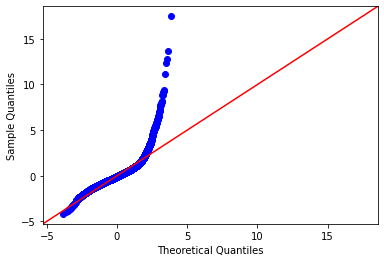

In [39]:
fig = sm.graphics.qqplot(model2c.resid, dist=stats.norm, line='45', fit=True)

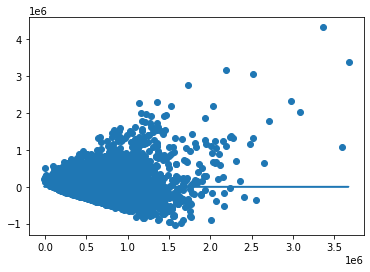

In [40]:
plt.scatter(model2c.predict(train2c[x_cols]), model2c.resid)
plt.plot(model2c.predict(train2c[x_cols]), [0 for i in range(len(train2c))])

In [ ]:
#train, test = train_test_split(df)

In [ ]:
# first_model = make_pipeline(
#     imputer_lot,
#     PolynomialFeatures(degree=3, include_bias=True),
#     LinearRegression()
# )

# Feature Engineering